In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('medical_charges.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [8]:
sns.set_style('darkgrid')

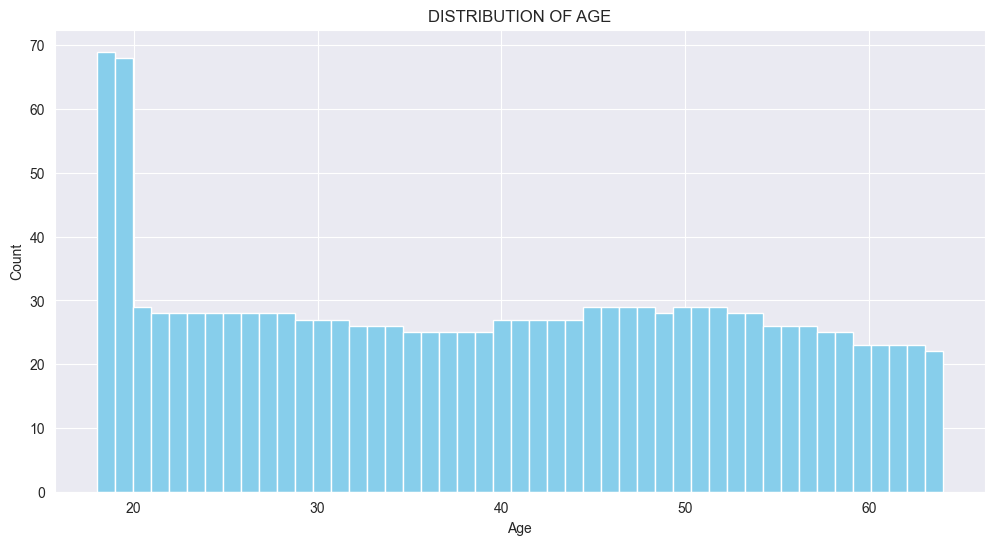

In [9]:
plt.figure(figsize=(12,6))
plt.hist(x=df['age'],bins=47,color='skyblue',edgecolor='white');
plt.xlabel('Age')
plt.ylabel('Count');
plt.title('DISTRIBUTION OF AGE');

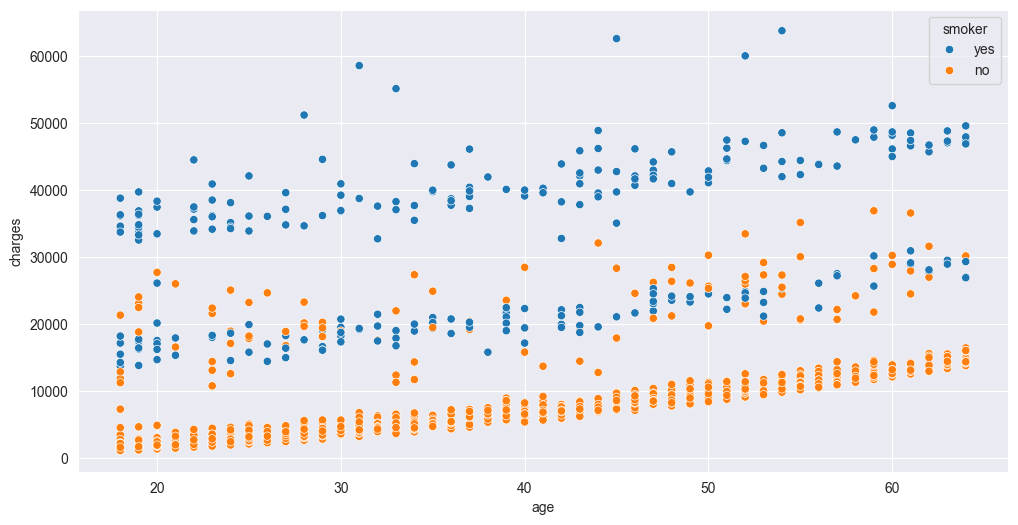

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='age',y='charges',data=df,hue='smoker');

In [11]:
nonsmokerdf=df[df.smoker=='no']

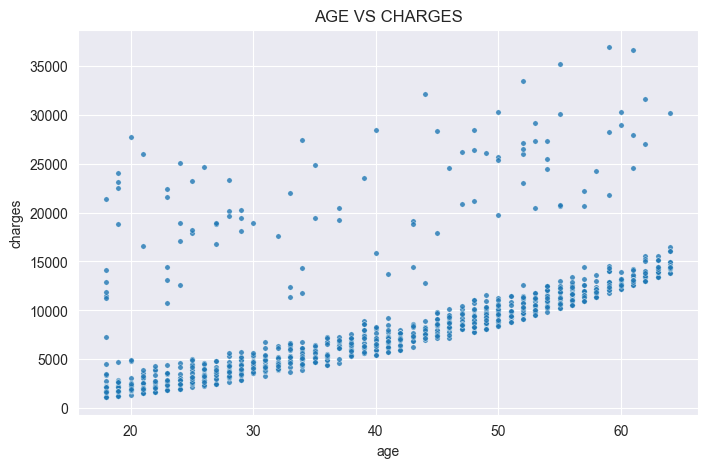

In [12]:
plt.figure(figsize=(8,5))
plt.title('AGE VS CHARGES')
sns.scatterplot(data=nonsmokerdf,x='age',y='charges',alpha=0.8,s=15);

In [13]:
# y=mx+c
# charges = m * age + c
def estimate_charges(age,m,c):
    return m*age + c

In [14]:
nonsmokerdf.age

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [15]:
estimated_charges=estimate_charges(nonsmokerdf.age,50,100)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [16]:
nonsmokerdf.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [17]:
target=nonsmokerdf.charges
age=nonsmokerdf.age

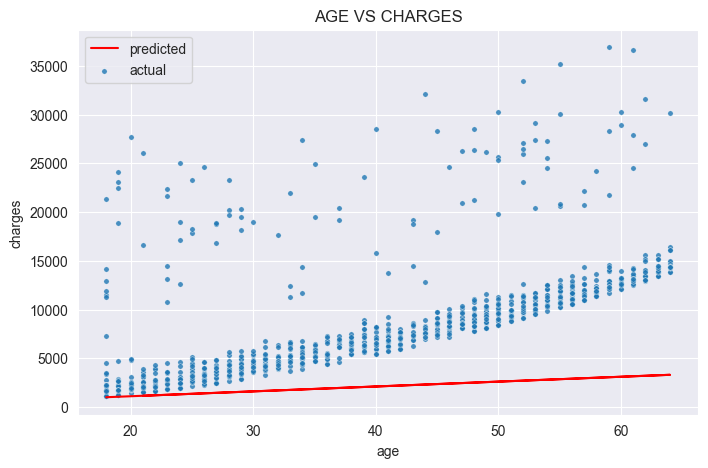

In [18]:
plt.figure(figsize=(8,5))
plt.title('AGE VS CHARGES')
plt.plot(age,estimated_charges,'r');
sns.scatterplot(x=age,y=target,alpha=0.8,s=15);
plt.legend(['predicted','actual'])

In [19]:
def try_parameters(m,c):
    estimated_charges=estimate_charges(age,m,c)
    plt.figure(figsize=(8,5))
    plt.title('AGE VS CHARGES')
    plt.plot(age,estimated_charges,'r');
    sns.scatterplot(x=age,y=target,alpha=0.8,s=15);
    plt.legend(['predicted','actual'])
    

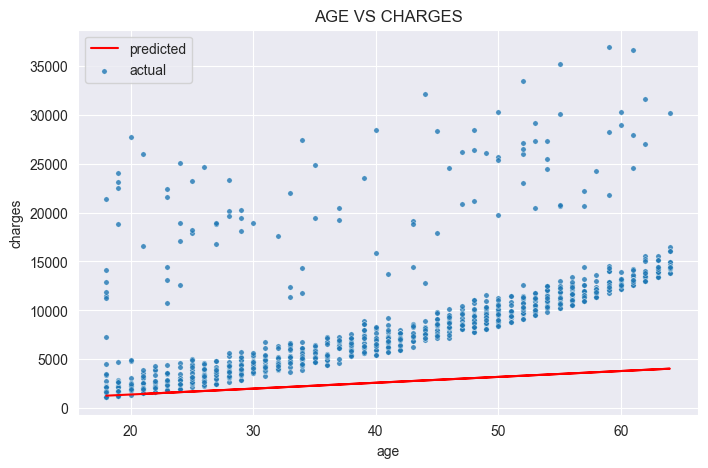

In [20]:
try_parameters(60,200)

Loss/Cost Function
We can compare our model's predictions with the actual targets using the following method:

Calculate the difference between the targets and predictions (the differenced is called the "residual")
Square all elements of the difference matrix to remove negative values.
Calculate the average of the elements in the resulting matrix.
Take the square root of the result
The result is a single number, known as the root mean squared error (RMSE). The above description can be stated mathematically as follows:

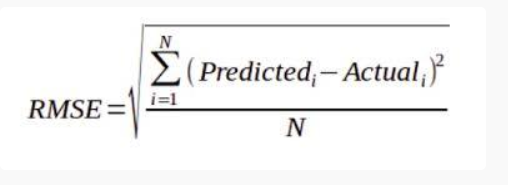

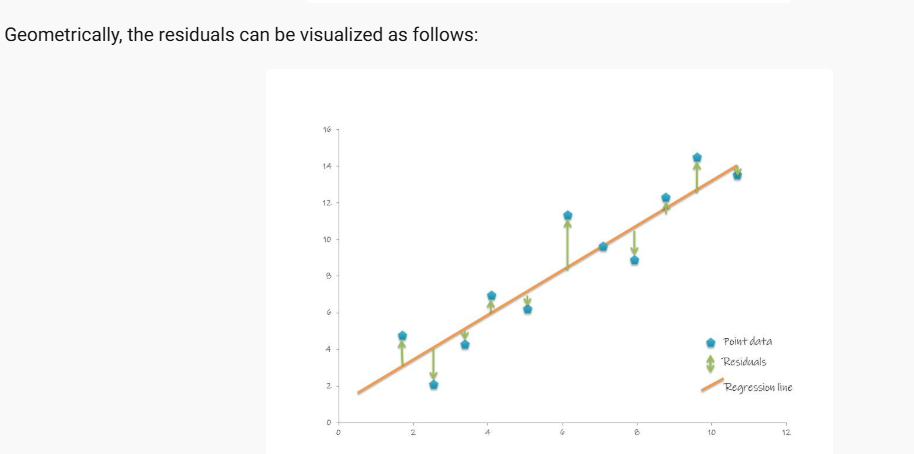

In [21]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [22]:
print(rmse(target,estimated_charges))

8461.949562575493


In [23]:
# modify the try parameters function to print the rmse also


In [24]:
def try_parameters(m,c):
    estimated_charges=estimate_charges(age,m,c)
    plt.figure(figsize=(8,5))
    plt.title('AGE VS CHARGES')
    plt.plot(age,estimated_charges,'r');
    sns.scatterplot(x=age,y=target,alpha=0.8,s=15);
    plt.legend(['predicted','actual'])

    loss=rmse(target,estimated_charges)
    print(f'RMSE loss:{loss}')

RMSE loss:8461.949562575493


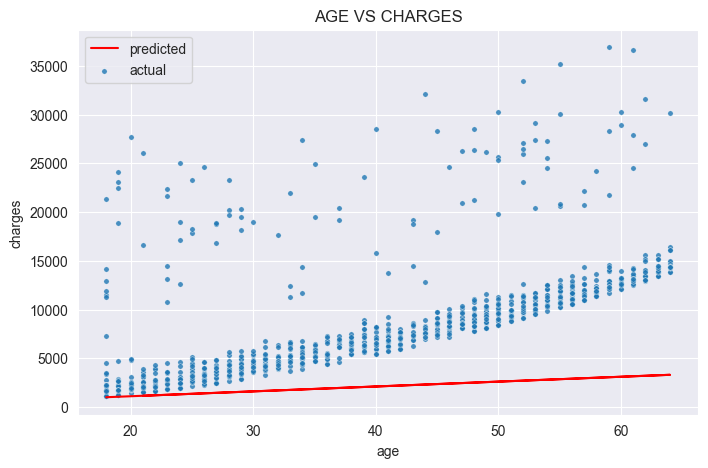

In [25]:
try_parameters(50,100)

# using linear regression now

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model=LinearRegression()

In [28]:
inputs=nonsmokerdf[['age']]
target=nonsmokerdf.charges
print(inputs.shape,target.shape)


(1064, 1) (1064,)


In [29]:
model.fit(inputs,target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
p=model.predict(inputs)

In [31]:
p

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

RMSE loss:4662.505766636395


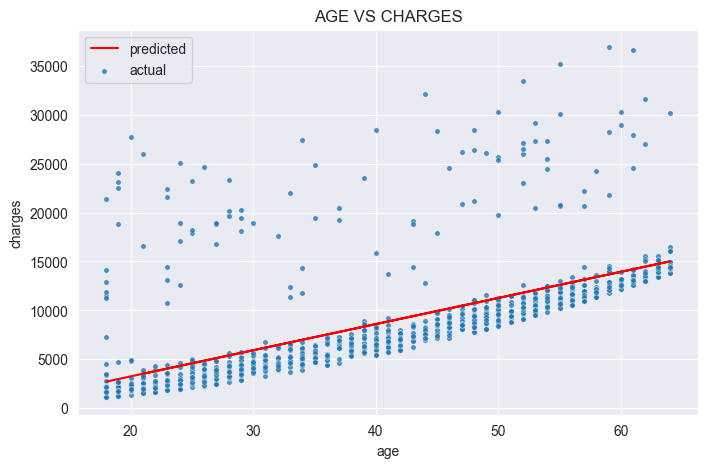

In [32]:
try_parameters(model.coef_,model.intercept_)

In [33]:
from sklearn.linear_model import SGDRegressor

In [34]:
model1=SGDRegressor()

In [35]:
model1.fit(inputs,target)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [36]:
prediction=model.predict(inputs)

In [37]:
prediction

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [38]:
print(rmse(target,prediction))

4662.505766636395


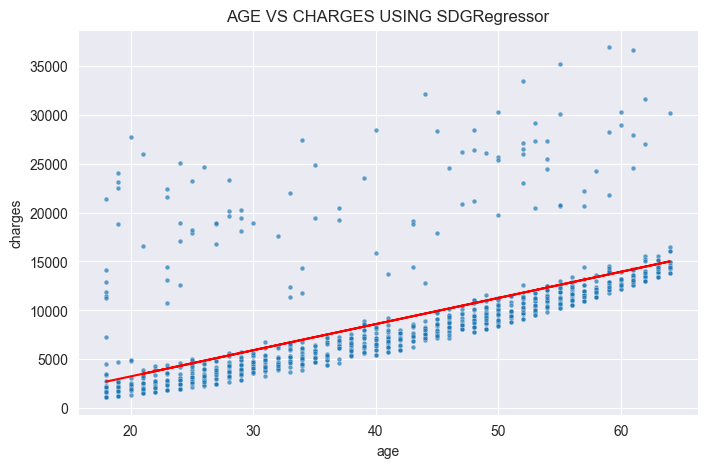

In [39]:
plt.figure(figsize=(8,5))
plt.title('AGE VS CHARGES USING SDGRegressor')
sns.scatterplot(x='age',y='charges',data=nonsmokerdf,alpha=0.7,s=12)
plt.plot(age,prediction,'r');